In [34]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
%store -r finaldf


In [35]:
digital = finaldf

In [36]:
digital.describe()

,date,Access Electricity,Cellular %,Fixed broadband %,GDP pcp PPP,Landline %,Secure Servers,Urbanisation,internet_users,year
count,12141.000000,5081.000000,8900.000000,2787.000000,4900.000000,8530.000000,2783.000000,11962.000000,4799.000000,6360.000000
mean,1988.000000,76.354191,27.188560,8.685747,13274.748422,16.212375,4607.073590,50.206976,21.392185,2001.500000
std,16.452628,32.766984,45.598534,11.555465,16816.850012,18.937313,30179.259934,25.988815,26.896916,8.656122
min,1960.000000,0.013999,0.000000,0.000000,242.001214,0.000000,1.000000,2.077000,0.000000,1987.000000
25%,1974.000000,56.906982,0.000000,0.176489,2282.084072,1.253908,10.000000,28.810250,0.507678,1994.000000
50%,1988.000000,96.652695,0.115280,2.614805,6817.718497,8.236764,60.000000,48.994500,7.038023,2001.500000
75%,2002.000000,100.000000,41.625305,14.060784,17825.324232,25.337312,479.500000,70.952500,36.920000,2009.000000
max,2016.000000,100.000000,332.090701,61.738849,140037.115597,132.953292,530309.000000,100.000000,98.323610,2016.000000


Charts to visualize: First, let's take a look at distribution of internet_users by year/country

In [37]:
mi = digital.copy()
digital.reset_index(inplace = True)

In [38]:
digital.head()

,index,country,date,Access Electricity,Cellular %,Fixed broadband %,GDP pcp PPP,Landline %,Secure Servers,Urbanisation,internet_users,Code,Region,code,year,cgroup
0,0,Afghanistan,2016,NaN,66.003744,0.026890,1876.544682,0.348892,49.0,27.132,10.595726,AFG,South Asia,AFG,2016.0,L
1,1,Afghanistan,2015,NaN,61.577682,0.022080,1861.124332,0.343677,46.0,26.703,8.260000,AFG,South Asia,AFG,2015.0,L
2,2,Afghanistan,2014,89.500000,58.845471,0.004795,1875.447407,0.325861,32.0,26.282,7.000000,AFG,South Asia,AFG,2014.0,L
3,3,Afghanistan,2013,75.154373,55.012226,0.004910,1877.411953,0.313466,30.0,25.871,5.900000,AFG,South Asia,AFG,2013.0,L
4,4,Afghanistan,2012,69.100000,51.434547,0.005029,1873.153946,0.301822,33.0,25.468,5.454545,AFG,South Asia,AFG,2012.0,L


In [39]:
mi.reset_index(inplace = True)
mi.set_index(["country", "date"], inplace = True)


In [40]:
mi.head()

index  Access Electricity  Cellular %  Fixed broadband %  \
country     date                                                             
Afghanistan 2016      0                 NaN   66.003744           0.026890   
            2015      1                 NaN   61.577682           0.022080   
            2014      2           89.500000   58.845471           0.004795   
            2013      3           75.154373   55.012226           0.004910   
            2012      4           69.100000   51.434547           0.005029   

                  GDP pcp PPP  Landline %  Secure Servers  Urbanisation  \
country     date                                                          
Afghanistan 2016  1876.544682    0.348892            49.0        27.132   
            2015  1861.124332    0.343677            46.0        26.703   
            2014  1875.447407    0.325861            32.0        26.282   
            2013  1877.411953    0.313466            30.0        25.871   
            2012  1873.153946    0.301822            33.0        25.468   

                  internet_users Code      Region code    year cgroup  
country     date                                                       
Afghanistan 2016       10.595726  AFG  South Asia  AFG  2016.0      L  
            2015        8.260000  AFG  South Asia  AFG  2015.0      L  
            2014        7.000000  AFG  South Asia  AFG  2014.0      L  
            2013        5.900000  AFG  South Asia  AFG  2013.0      L  
            2012        5.454545  AFG  South Asia  AFG  2012.0      L

In [8]:
#for that, we drop all NaNs that are still extant

digital['internet_users'].dropna(inplace = True)
digital.head()

,date,country,Access Electricity,Cellular %,Fixed broadband %,GDP pcp PPP,Landline %,Secure Servers,Urbanisation,internet_users
0,1996,Afghanistan,0.000000,0.000000,0.0,0.000000,0.157478,0.0,20.055,0.000000
1,1996,Albania,100.000000,0.068841,0.0,3109.183498,1.911080,0.0,39.473,0.032197
2,1996,Algeria,95.352905,0.039202,0.0,7059.883533,4.282570,0.0,56.774,0.001739
3,1996,Angola,44.342175,0.026486,0.0,2380.132838,0.422625,0.0,29.570,0.000776
4,1996,Antigua and Barbuda,85.741631,1.850666,0.0,12693.314580,39.860488,0.0,33.590,2.858450


In [9]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

/home/antonia/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


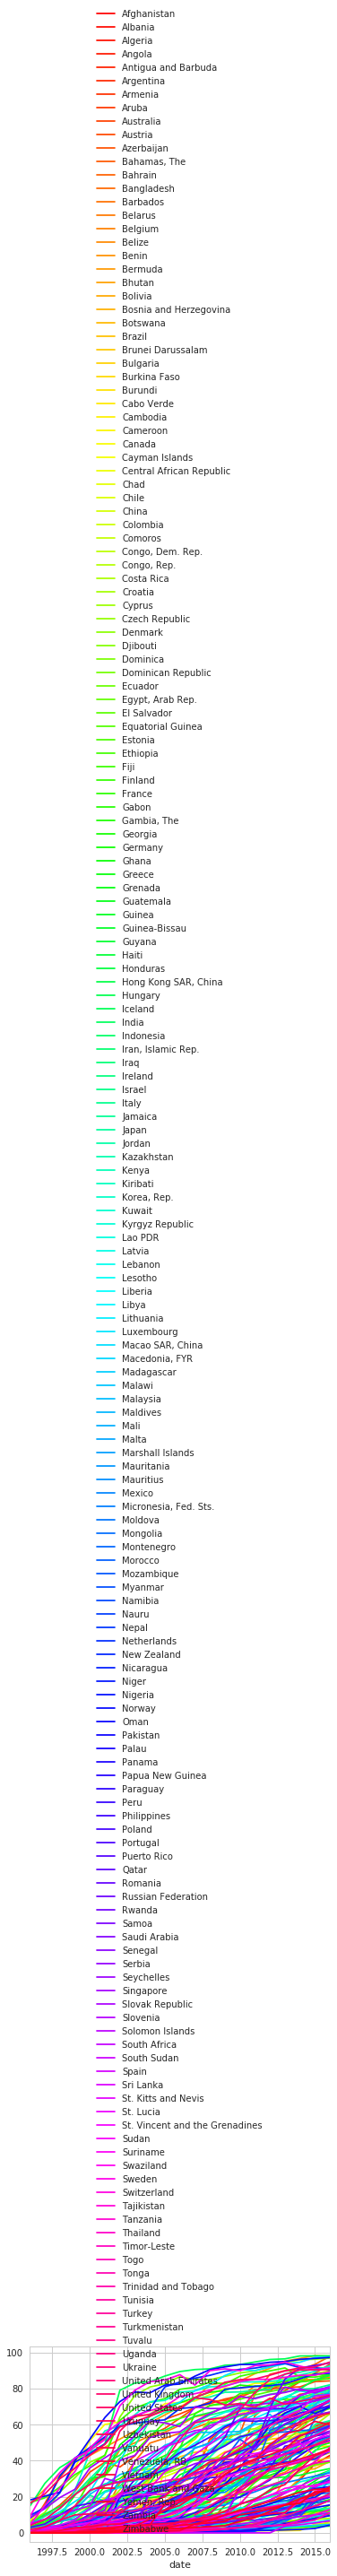

In [10]:
#use ax notation to plot all the lineplots on one plot(probably not good visualization, but should be working)

fig, ax = plt.subplots()
countries = list(digital['country'].unique())
cmap = get_cmap(len(countries))

for i,country in enumerate(countries):
    digital[digital['country'] == country].plot(x = 'date', y = "internet_users", c=cmap(i), label = country, ax = ax)

/home/antonia/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


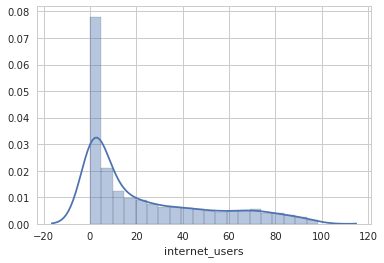

In [11]:
sns.distplot(digital['internet_users'])

/home/antonia/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


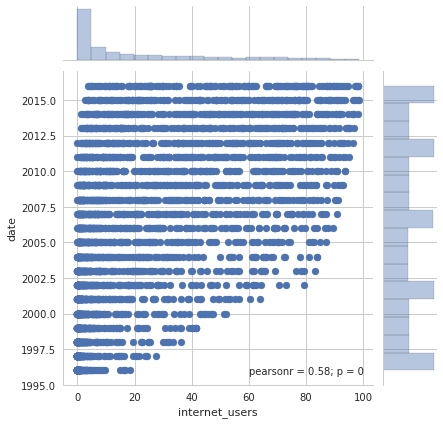

In [12]:
sns.jointplot(x = digital['internet_users'], y = digital['date'])

/home/antonia/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


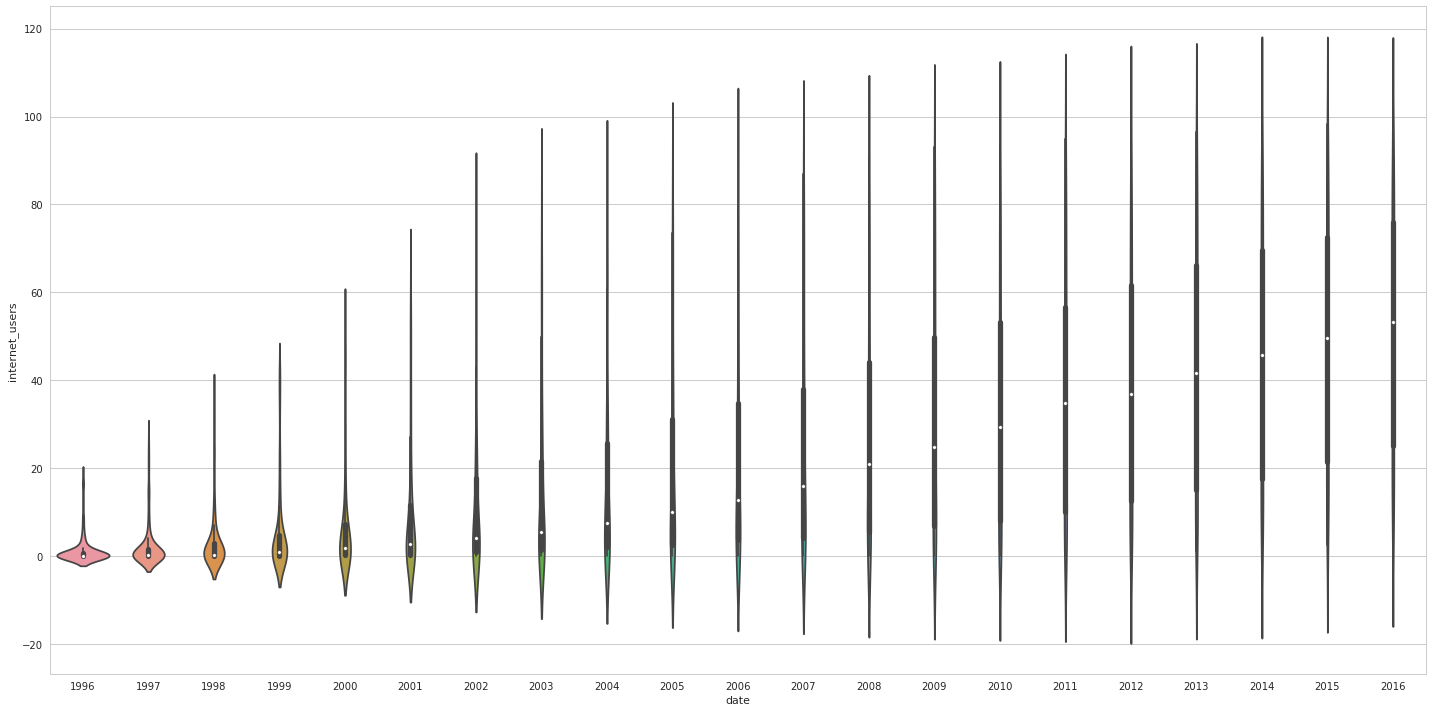

In [13]:
f, axs = plt.subplots(figsize=(20,10))
sns.violinplot(x='date', y ='internet_users', data = digital)
plt.tight_layout()
#can't get the one with hue = country to work 

/home/antonia/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


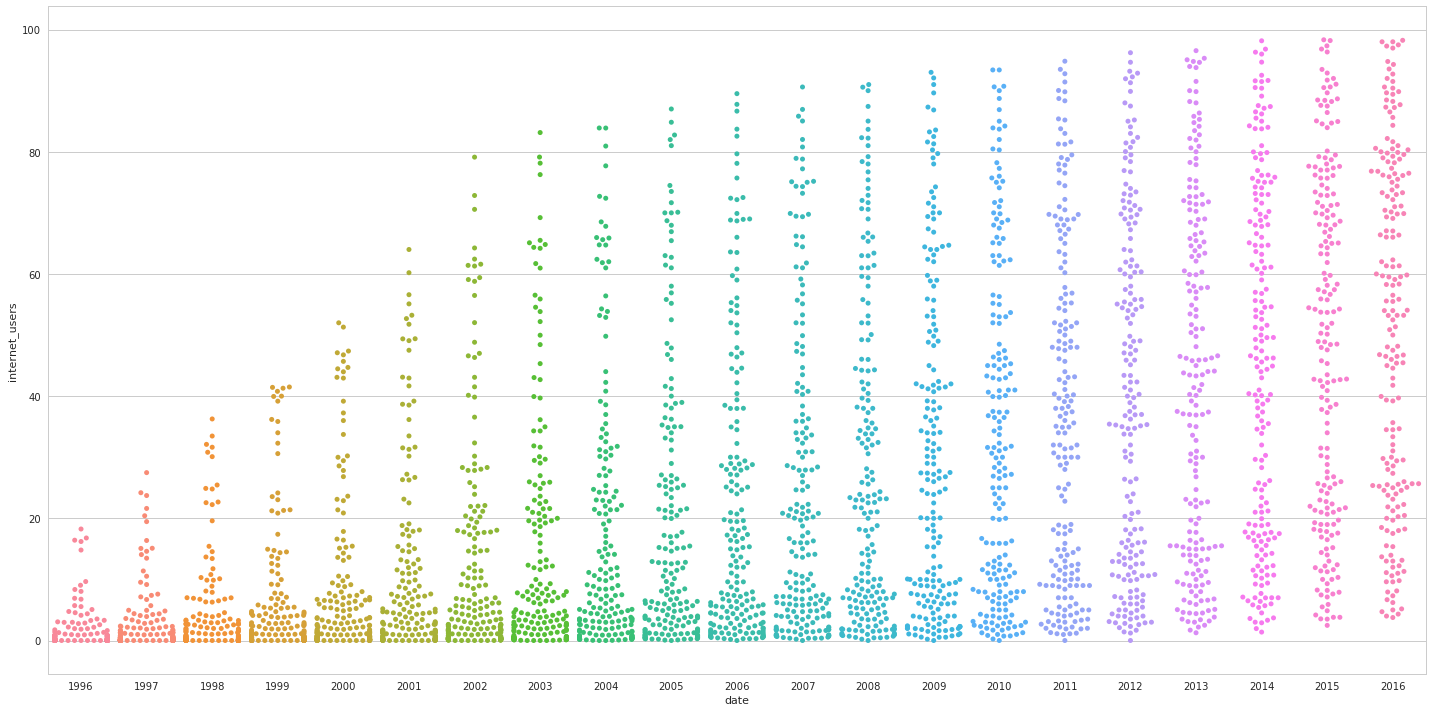

In [14]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.swarmplot(x='date', y ='internet_users', data = digital)
plt.tight_layout()

/home/antonia/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


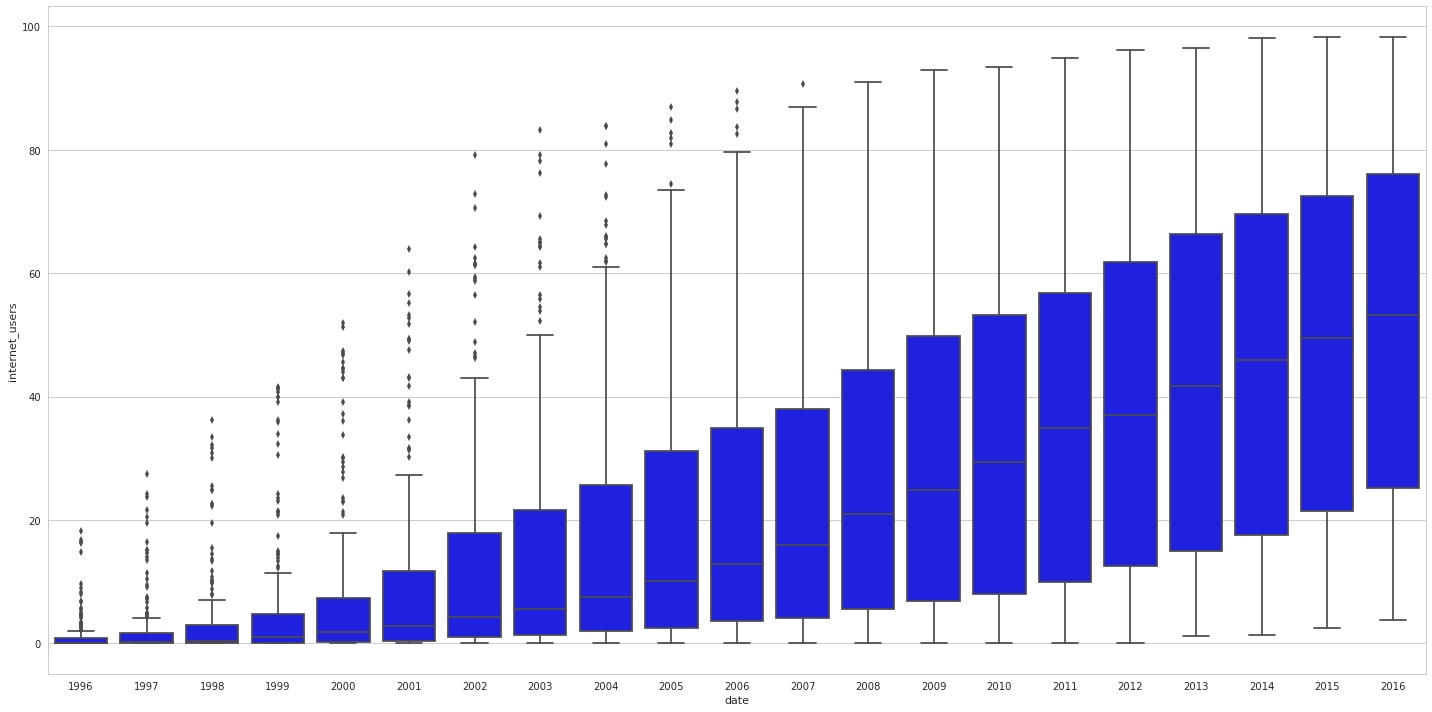

In [15]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(x='date', y ='internet_users', color = 'blue', data = digital)
plt.tight_layout()
#fontsize larger


In [21]:
###need to combine this data with additional group data:
#1. Region
#2. By Income
#3. By digital freedom?
digital.head()
digital[digital.columns[2:]]

,Access Electricity,Cellular %,Fixed broadband %,GDP pcp PPP,Landline %,Secure Servers,Urbanisation,internet_users
0,0.000000,0.000000,0.000000,0.000000,0.157478,0.0,20.055,0.000000
1,100.000000,0.068841,0.000000,3109.183498,1.911080,0.0,39.473,0.032197
2,95.352905,0.039202,0.000000,7059.883533,4.282570,0.0,56.774,0.001739
3,44.342175,0.026486,0.000000,2380.132838,0.422625,0.0,29.570,0.000776
4,85.741631,1.850666,0.000000,12693.314580,39.860488,0.0,33.590,2.858450
5,93.496567,1.891500,0.000000,10754.198419,17.759258,0.0,88.366,0.141955
6,98.387535,0.009454,0.000000,1734.655302,18.261027,0.0,65.781,0.094573
7,90.646477,3.605986,0.000000,0.000000,40.358195,0.0,48.356,2.768383
8,100.000000,21.756868,0.000000,22075.367834,50.002626,0.0,86.283,3.275250
9,100.000000,7.475118,0.000000,24475.621226,48.713097,0.0,65.800,6.909162


/home/antonia/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/antonia/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


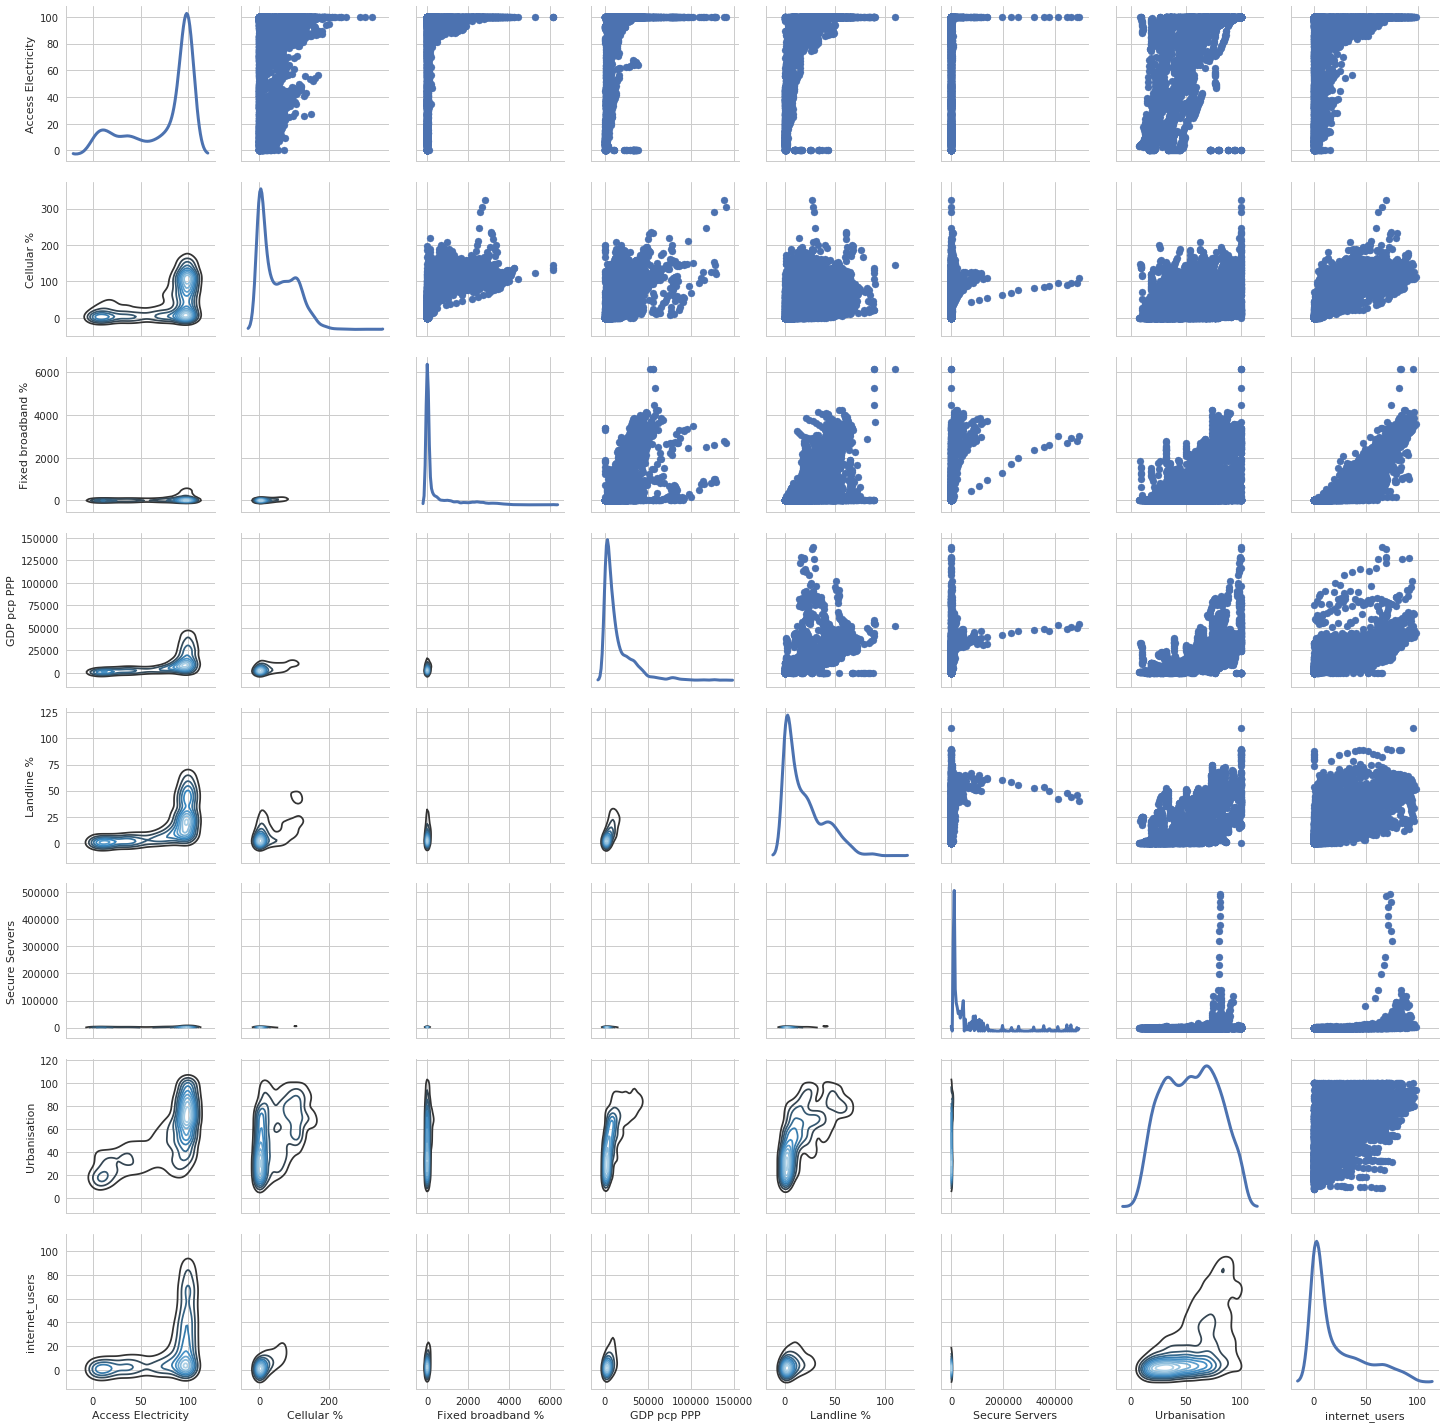

In [25]:
##pairplot cannot deal with missing values
nona = digital.dropna()
g = sns.PairGrid(nona[nona.columns[2:]], diag_sharey = False)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 3)